# FOI requests data analysis

As of November 7, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

**Note**: There were some weeks in 2022 when the scraper failed to run because the website was down. I'm still in the process of looking into entries that were missed. So far, the scraper runs every three days and fetches 3,000 entries every time. This ensures that new entries (and some old ones are collected). We drop the duplicates in the cleaning process.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *
pd.set_option("display.max_columns", None)

## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
df = pd.read_csv('foi_final.csv')
df.tail(10)

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_22320/1295593880.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,agency,date,title,status,purpose,period_covered,link,reason_denial
151739,151739,PCSO,2022-11-07,Financial assistance for my husband to have co...,PENDING,Financial Help for complete medication for my ...,10/20/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151740,151740,DSWD,2022-11-07,4Ps Beneficiaries and Budget from 2007 to 2022,ACCEPTED,Research purposes,01/01/2007 - 11/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151741,151741,DOH,2022-11-07,REQUEST FOR STROKE DATA,PENDING,RESEARCH PURPOSES,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151742,151742,PSA,2022-11-07,REQUEST FOR STROKE DATA,PENDING,RESEARCH PURPOSES,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151743,151743,JJWC,2022-11-07,CICL CALABARZON,PENDING,Thesis Research,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151744,151744,PNP,2022-11-07,CICL CALABARZON,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151745,151745,PNP,2022-11-07,CICL REGION 3,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151746,151746,NAMRIA,2022-11-07,Climate Disaster Risk Assessment of San Juan B...,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151747,151747,NBI,2022-11-07,ONLINE SCAM,PENDING,Personal,11/06/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151748,151748,DOLE,2022-11-07,Thesis,PENDING,Research,10/28/2021 - 10/28/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Drop 'Unnamed' column

In [3]:
df=df.drop('Unnamed: 0', axis=1)
df

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,—
1,NAP,2016-11-25,Juan Arellano Drawings and Plans of Plaza Impr...,SUCCESSFUL,Research work on urban and public history duri...,01/01/1930 - 12/31/1950,NaN,—
2,PNP,2016-11-25,"Number of robbery, rape and riding in tandem c...",CLOSED,Research,06/01/2006 - 11/01/2016,NaN,—
3,PSA,2016-11-25,Ethnographic Population in the Philippines,SUCCESSFUL,Research,11/25/2000 - 11/25/2016,NaN,—
4,PCOO,2016-11-25,Agencies,DENIED,Research and basis of authenticity,07/01/2016 - 11/25/2016,NaN,—
...,...,...,...,...,...,...,...,...
151744,PNP,2022-11-07,CICL CALABARZON,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151745,PNP,2022-11-07,CICL REGION 3,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151746,NAMRIA,2022-11-07,Climate Disaster Risk Assessment of San Juan B...,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
151747,NBI,2022-11-07,ONLINE SCAM,PENDING,Personal,11/06/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Convert to datetime

In [4]:
df.dtypes

agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Check for duplicates

There are some duplicates found, but let's check. Remember, we only drop the duplicates if they are the same across **all columns**. Otherwise, we keep them, especially if the same requests are filed with different agencies.

In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated()]

,agency,date,title,status,purpose,period_covered,link,reason_denial


## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [9]:
df.isna().sum()

agency                1
date                  0
title                 3
status                0
purpose               4
period_covered        0
link              90765
reason_denial     60984
dtype: int64

Interpretation: The **link** column have nearly 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [10]:
df.status.value_counts(normalize=True) *100

SUCCESSFUL                35.832197
DENIED                    22.301300
PENDING                   17.461071
ACCEPTED                   7.399719
PARTIALLY SUCCESSFUL       6.522613
AWAITING CLARIFICATION     3.692940
REFERRED                   2.578600
CLOSED                     2.282717
PROCESSING                 1.879419
EXTENDED                   0.049424
Name: status, dtype: float64

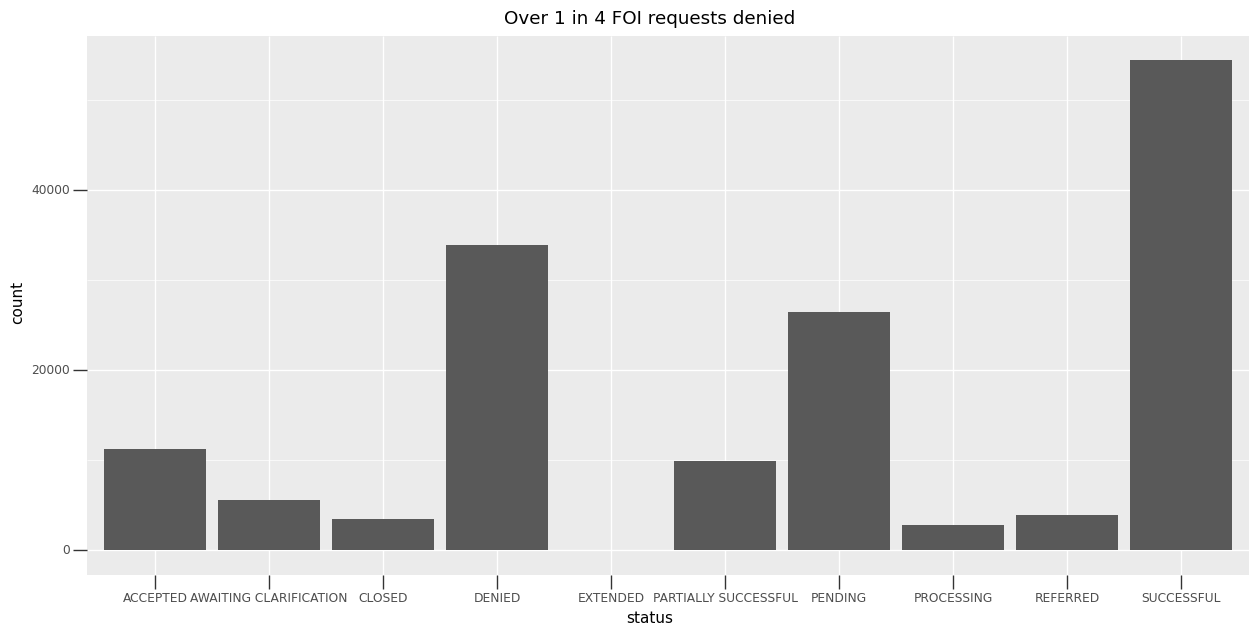

<ggplot: (686133537)>

In [11]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [12]:
df.agency.value_counts().head(10)

DOH      15123
PSA       8733
DOLE      6419
BIR       6394
DepEd     6241
SSS       5277
DSWD      5212
NTC       4540
OWWA      4356
DPWH      3819
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [13]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     3429
DSWD    3079
NBI     1600
DENR    1439
DOH     1237
DTI     1175
DOLE     877
DOTr     866
HDMF     818
NTC      756
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [14]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate           442
Vaxcert                           292
VaxCert                           141
Vaccination Card                  138
Vaccine Certificate               128
Vaccination certificate           115
Lost Vaccination Card             113
Lost Vaccine Card                  95
VAXCERT                            81
Vax Cert                           72
Vax Certificate                    67
Vaccination card                   61
Vaccine certificate                58
VACCINATION CERTIFICATE            58
VaxCertPH                          50
Vaxcert; incorrect middle name     48
vaxcert                            46
Vaccine Card                       40
Vaxcertificate                     37
vaccination certificate            36
Name: title, dtype: int64

In [15]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)].reset_index(drop=True)
df_vax.count()

agency            1754
date              1754
title             1754
status            1754
purpose           1754
period_covered    1754
link              1318
reason_denial      436
dtype: int64

Interpretation: Over one in 10 DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [16]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)].reset_index(drop=True)
df_sap[df_sap.status=="DENIED"].head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
1,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
2,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
3,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
4,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
5,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
6,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
7,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
8,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
9,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

In [17]:
df_sap.count()
#180 requests about SAP.

agency            182
date              182
title             182
status            182
purpose           182
period_covered    182
link                7
reason_denial     175
dtype: int64

## OVP: Any type of "assistance"

The office of former Vice President Leni Robredo is known for its **Angat Buhay** program that helps the poor.

In [18]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    612
True     440
Name: title, dtype: int64

Interpretation: 40% of OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [19]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification', 'tax', 'tax records']
df_tax = df[df['title'].isin(tax)].reset_index(drop=True)
df_tax.tail(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
1668,BIR,2022-10-19,BIR 2316,DENIED,Pay evidence for each period of employment to ...,01/01/2010 - 12/31/2016,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1669,BIR,2022-10-21,Income Tax Return,SUCCESSFUL,Proof of income for credit card application,01/01/2021 - 09/30/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1670,BIR,2022-10-22,TIN Verification,DENIED,Local employment (pre-employment requirement),02/10/2016 - 10/22/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1671,BIR,2022-10-23,Form 2316,SUCCESSFUL,For application aboad purposes,01/01/2015 - 05/31/2019,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1672,BIR,2022-10-23,Form 2316,AWAITING CLARIFICATION,For application to aboad purposes,01/01/2015 - 05/31/2019,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1673,BIR,2022-10-23,Income Tax Return,AWAITING CLARIFICATION,Application for scholarship,10/23/2022 - 10/23/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1674,BIR,2022-10-26,Income Tax Return,DENIED,Scholarship application,09/01/2022 - 10/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1675,BIR,2022-11-02,Income Tax Return,SUCCESSFUL,Visa Application,10/01/2018 - 10/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1676,BIR,2022-11-02,Income Tax Return,SUCCESSFUL,For my Credit Card Application and VISA Requir...,01/01/2022 - 10/31/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
1677,BIR,2022-11-04,Income Tax Return,SUCCESSFUL,Visa Application,11/02/2021 - 11/04/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [20]:
df_tax.status.value_counts()

DENIED                    743
AWAITING CLARIFICATION    568
SUCCESSFUL                121
PENDING                   115
ACCEPTED                   55
PARTIALLY SUCCESSFUL       47
REFERRED                   15
CLOSED                      8
PROCESSING                  5
EXTENDED                    1
Name: status, dtype: int64

In [21]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    44.278903
AWAITING CLARIFICATION    33.849821
SUCCESSFUL                 7.210965
PENDING                    6.853397
ACCEPTED                   3.277712
PARTIALLY SUCCESSFUL       2.800954
REFERRED                   0.893921
CLOSED                     0.476758
PROCESSING                 0.297974
EXTENDED                   0.059595
Name: status, dtype: float64

# Top purpose of requests

In [22]:
df.purpose.value_counts(ascending=False).head(10)

Research                    12026
Research and Development     6058
Undergraduate Thesis         2740
Thesis                       2704
Architectural Thesis         2523
Research and development     2405
Academic Research            1034
Thesis Research              1009
research                      707
Undergraduate Research        598
Name: purpose, dtype: int64

## For academic purposes

In [23]:
research = df.purpose.str.extractall(r'(.*\bresearch.+)', re.IGNORECASE)
research

,,0
,match,
1,0,Research work on urban and public history duri...
4,0,Research and basis of authenticity
11,0,Research & Development
12,0,Research study
15,0,Research and Development
...,...,...
151724,0,Research and Development
151728,0,Research and Development
151740,0,Research purposes


In [24]:
thesis = df.purpose.str.extractall(r'(.*\bthesis.+)', re.IGNORECASE)
thesis

,,0
,match,
24,0,Architectural Thesis entitled Cagayan de Oro C...
27,0,School Paper Research(Thesis)
30,0,Thesis Research
39,0,Research for Cebu City Development to be used ...
108,0,Research / Possible Thesis Study
...,...,...
151684,0,Architectural Thesis Research
151693,0,For thesis purposes only
151709,0,For thesis writing


In [25]:
academic = df.purpose.str.extractall(r'(.*\bacademic.+)', re.IGNORECASE)
academic

,,0
,match,
82,0,Academic research
365,0,Academic research
384,0,Academic Research
457,0,Academic research
463,0,Academic Research
...,...,...
151636,0,Plant Design/Academic Research
151657,0,Research is intended for Academic purposes
151698,0,Academic/Thesis


In [26]:
research_2 = pd.concat([research, academic, thesis], ignore_index=True)
research_2.columns= ['purpose']
research_2

,purpose
0,Research work on urban and public history duri...
1,Research and basis of authenticity
2,Research & Development
3,Research study
4,Research and Development
...,...
41615,Architectural Thesis Research
41616,For thesis purposes only
41617,For thesis writing
41618,Architectural Thesis Writing


In [27]:
# research_2 = research_2.merge(df, on='purpose')
# research_2.duplicated().value_counts()

In [28]:
#research_2[research_2.duplicated()]

## For journalistic purposes

In [29]:
news = df.purpose.str.extractall(r'(.*\bnews.+)', re.IGNORECASE)
news

,,0
,match,
68,0,news article
74,0,news article
85,0,News report
210,0,"This will be used for the verification of ""new..."
247,0,Research and news article
...,...,...
139543,0,Investigative News Report
139766,0,Investigative News Report
140005,0,verification purposes. in support for news abo...


In [30]:
media = df.purpose.str.extractall(r'(.*\bmedia.+)', re.IGNORECASE)

In [31]:
journalism = pd.concat([news, media], ignore_index=True)
journalism.columns= ['purpose']
journalism

,purpose
0,news article
1,news article
2,News report
3,"This will be used for the verification of ""new..."
4,Research and news article
...,...
556,Academic research in COMM 120 (Laws on Communi...
557,Academic research in COMM 120 (Laws on Communi...
558,Media coverage
559,Media coverage


In [32]:
journalism = journalism.merge(df, on='purpose')
journalism.duplicated().sum()

1960

In [33]:
journalism = journalism.drop_duplicates().reset_index(drop=True)
journalism

,purpose,agency,date,title,status,period_covered,link,reason_denial
0,news article,PNP,2016-11-27,oplan tokhang,SUCCESSFUL,07/01/2016 - 11/02/2016,NaN,—
1,news article,PNP,2016-11-27,PNP Region 9 Director Billy Beltran and PNP Ge...,DENIED,06/01/2016 - 07/02/2016,NaN,incomplete-request
2,News report,DBM,2016-11-28,"Cost of President Duterte's trip to Laos, Chin...",DENIED,09/05/2016 - 11/23/2016,NaN,—
3,News report,PCOO,2017-01-27,Cost of each of President Duterte's foreign tr...,DENIED,09/05/2016 - 12/17/2016,NaN,wrong-agency
4,News report,PDEA,2017-11-21,Statistics on drug prices,DENIED,07/01/2016 - 11/21/2017,NaN,—
...,...,...,...,...,...,...,...,...
546,Academic research in COMM 120 (Laws on Communi...,DOTr,2022-10-08,Proposed developments for the construction of ...,AWAITING CLARIFICATION,02/01/2019 - 10/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
547,Academic research in COMM 120 (Laws on Communi...,DOTr,2022-10-08,Proposed developments for the construction of ...,PENDING,02/01/2019 - 10/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
548,Media coverage,PNP,2022-10-11,The homicide case of Randel Valdez Balnek,SUCCESSFUL,10/06/2022 - 10/08/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
549,Media coverage,PNP,2022-10-11,The homicide case of Randel Valdez Balnek,PROCESSING,10/06/2022 - 10/08/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [34]:
df[df.agency=="OP"]
#There were some requests for SALN.

,agency,date,title,status,purpose,period_covered,link,reason_denial
2567,OP,2017-12-01,Total cost/expenses for the foreign trips of P...,PENDING,For research purposes for my year-end report f...,01/01/2017 - 12/01/2017,NaN,—
2595,OP,2017-12-04,Cost of President Duterte's foreign trips in h...,PENDING,News research,07/01/2016 - 07/01/2017,NaN,—
2603,OP,2017-12-05,Updates on the appeals of suspended and closed...,PENDING,Research,02/02/2017 - 12/05/2017,NaN,—
2703,OP,2017-12-24,2018 General Appropriations Act,PENDING,Factual basis in research and review of certai...,12/24/2017 - 12/24/2017,NaN,—
2720,OP,2017-12-30,Executive Order 126 dated 1959,PENDING,HISTORY,12/30/2017 - 12/30/2017,NaN,—
3026,OP,2018-01-31,NSC Group Photos with Living Former Presidents,PENDING,Research and Archive purposes.,07/27/2016 - 07/27/2016,NaN,—
3168,OP,2018-02-11,Documentary proof or evidence of President Dut...,PENDING,Research for Graduate School class.,03/28/1945 - 02/11/2018,NaN,—
3179,OP,2018-02-11,What is the counterpart of the CIA in the Phil...,PENDING,Research,02/11/2018 - 02/11/2018,NaN,—
3183,OP,2018-02-11,Breakdown of War Materiel used by the AFP in t...,PENDING,Research for Graduate School class.,05/23/2017 - 11/23/2017,NaN,—
3227,OP,2018-02-13,Actual Expenses of ASEAN 2017 budget,PENDING,Research purposes,01/01/2017 - 01/01/2018,NaN,—


## Government contracts

In [35]:
contract = ['contract', 'contracts', 'audit', 'audit report', 'Audit report', 'Audit Report', 'Contract', 'Contracts', 'loan agreement', 'Agreements', 'Agreement', 'agreement', 'agreements']
df_contract = df[df['title'].isin(contract)].reset_index(drop=True)
df_contract.head(7)


,agency,date,title,status,purpose,period_covered,link,reason_denial
0,LRTA,2019-03-29,Contract,DENIED,For own personal use or information,01/01/2018 - 12/31/2018,NaN,—
1,DFA,2021-03-14,Audit Report,DENIED,Research Purpose,01/01/2018 - 07/30/2020,NaN,information-available-online
2,PPPC,2022-06-19,Contracts,DENIED,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
3,LTO,2022-06-19,Contract,PENDING,Research,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
4,LRA,2022-06-19,Contract,PENDING,Research,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
5,PPPC,2022-06-19,Contracts,PENDING,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
6,PPPC,2022-06-19,Contracts,ACCEPTED,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Top reasons for denial

Applicable only to data as of December 2021.

In [36]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77314
NaN                             60984
wrong-agency                     6980
incomplete-request               2764
invalid-request                  2084
information-available-online     1620
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

In [37]:
df[df.reason_denial=='wrong-agency'].tail(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
89730,CHED,2021-12-18,Request for laptop,DENIED,Educational and future career purposes.,11/26/2021 - 12/18/2021,NaN,wrong-agency
89765,DOTr,2021-12-18,Kalibo International Airport Informations,DENIED,Research for Thesis,12/18/2021 - 12/18/2021,NaN,wrong-agency
89806,NTC,2021-12-19,Requesting for Individual/Company name uses th...,DENIED,All my contacts got an sms blast from this num...,12/19/2021 - 12/19/2021,NaN,wrong-agency
89808,PH,2021-12-19,Vaccination Certificate,DENIED,To Travel,06/14/2021 - 07/12/2021,NaN,wrong-agency
89812,PH,2021-12-19,VaccinationCertificate,DENIED,To travel,06/14/2021 - 07/12/2021,NaN,wrong-agency
90063,DENR,2021-12-21,Certificate of ancestral domain title in Sioco...,DENIED,To verify that who is the head of CADT in Siti...,12/21/2021 - 12/21/2021,NaN,wrong-agency
90256,CHED,2021-12-23,Registration Form 001,DENIED,Employment Requirements,01/01/2018 - 12/23/2021,NaN,wrong-agency
90381,NAP,2021-12-27,Birth Record,DENIED,SSS Funeral Benefit,07/09/1943 - 07/09/1945,NaN,wrong-agency
90567,DAR,2021-12-28,"CLUP and Zoning Ordinance of Angono, Rizal",DENIED,Research,12/28/2021 - 12/28/2021,NaN,wrong-agency
90733,DOJ,2021-12-31,INFORMATION,DENIED,RESOLUTION AND INFORMATION,11/19/2021 - 12/31/2021,NaN,wrong-agency


In [38]:
df.status.value_counts()

SUCCESSFUL                54375
DENIED                    33842
PENDING                   26497
ACCEPTED                  11229
PARTIALLY SUCCESSFUL       9898
AWAITING CLARIFICATION     5604
REFERRED                   3913
CLOSED                     3464
PROCESSING                 2852
EXTENDED                     75
Name: status, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [39]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    151454
True        292
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [40]:
saln = df.title.str.extractall(r'(.*\bSALN.+)', re.IGNORECASE)
saln.columns= ['title']
#374 requests mentioning SALN.

In [41]:
saln = saln.merge(df, on='title')
saln

,title,agency,date,status,purpose,period_covered,link,reason_denial
0,SALN of Bongbong Marcos,DOTr,2016-11-25,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN,wrong-agency
1,"SALN of the following: Ronnan Y. Pado, Ernani ...",DOF,2016-12-05,DENIED,Transparency,12/31/2015 - 12/31/2015,NaN,incomplete-request
2,SALN of Niño Maximino A. Lazaro Municipal Coun...,DOF,2016-12-17,DENIED,Public Information,07/01/2013 - 12/31/2015,NaN,wrong-agency
3,The SALNs of each of the cabinet members of th...,PCOO,2016-12-23,SUCCESSFUL,news reporting/public information,06/30/2016 - 12/23/2016,NaN,—
4,The SALNs of Presidents Aquino and Duterte's C...,PCOO,2017-01-18,SUCCESSFUL,Research,06/30/2016 - 06/30/2016,NaN,—
...,...,...,...,...,...,...,...,...
482,SALN of Gerald Bantag as employee of BuCor,DOJ,2022-10-28,PENDING,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
483,SALN of Gerald Bantag as employee of BuCor,DOJ,2022-10-28,SUCCESSFUL,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
484,SALN of Gerald Bantag as employee of BuCor,BUCOR,2022-10-28,DENIED,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
485,SALN of Gerald Bantag as employee of BuCor,BUCOR,2022-10-28,PENDING,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [42]:
saln = saln.drop_duplicates()
saln

,title,agency,date,status,purpose,period_covered,link,reason_denial
0,SALN of Bongbong Marcos,DOTr,2016-11-25,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN,wrong-agency
1,"SALN of the following: Ronnan Y. Pado, Ernani ...",DOF,2016-12-05,DENIED,Transparency,12/31/2015 - 12/31/2015,NaN,incomplete-request
2,SALN of Niño Maximino A. Lazaro Municipal Coun...,DOF,2016-12-17,DENIED,Public Information,07/01/2013 - 12/31/2015,NaN,wrong-agency
3,The SALNs of each of the cabinet members of th...,PCOO,2016-12-23,SUCCESSFUL,news reporting/public information,06/30/2016 - 12/23/2016,NaN,—
4,The SALNs of Presidents Aquino and Duterte's C...,PCOO,2017-01-18,SUCCESSFUL,Research,06/30/2016 - 06/30/2016,NaN,—
...,...,...,...,...,...,...,...,...
468,SALN of Gerald Bantag as employee of BJMP,BJMP,2022-10-28,ACCEPTED,Academic Research,01/01/2014 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
471,SALN of Gerald Bantag as employee of BuCor,DOJ,2022-10-28,SUCCESSFUL,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
472,SALN of Gerald Bantag as employee of BuCor,BUCOR,2022-10-28,DENIED,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
473,SALN of Gerald Bantag as employee of BuCor,BUCOR,2022-10-28,PENDING,Academic research,01/01/2019 - 10/28/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [43]:
saln.to_csv('saln.csv')

In [44]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\bSALN.+)', re.IGNORECASE).value_counts().sum()
#66 requests for the SALN of the Vice President.

77

## Drug war

In [45]:
drug_war = df.title.str.extractall(r'(.*\bdrug war.+)', re.IGNORECASE)

In [46]:
war_on_drugs = df.title.str.extractall(r'(.*\bwar on drugs.+)', re.IGNORECASE)

In [47]:
drugs = pd.concat([drug_war, war_on_drugs], ignore_index=True)
drugs

,0
0,Impact of Drug War on Children
1,DOJ drug war panel preliminary report
2,Data breakdown of drug war cases
3,Drug war orphans
4,Drug war orphans
5,Drug war orphans
6,Drug war orphans
7,Drug war orphans
8,"Statistics on war on drugs nationwide AND, spe..."
9,War On Drugs/Oplan Tokhang


In [48]:
drugs.columns= ['title']

In [98]:
drugs = drugs.merge(df, on='title')
drugs.head(10)

,title,agency_x,date_x,status_x,purpose_x,period_covered_x,link_x,reason_denial_x,agency_y,date_y,status_y,purpose_y,period_covered_y,link_y,reason_denial_y,status_code
0,Impact of Drug War on Children,DSWD,2020-03-02,DENIED,academic research,06/01/2016 - 03/02/2020,NaN,—,DSWD,2020-03-02,DENIED,academic research,06/01/2016 - 03/02/2020,NaN,—,0
1,DOJ drug war panel preliminary report,DOJ,2021-06-14,DENIED,For media report,06/01/2020 - 02/01/2021,NaN,—,DOJ,2021-06-14,DENIED,For media report,06/01/2020 - 02/01/2021,NaN,—,0
2,Data breakdown of drug war cases,DOJ,2021-06-21,ACCEPTED,For media research and report,06/01/2016 - 05/31/2020,NaN,—,DOJ,2021-06-21,ACCEPTED,For media research and report,06/01/2016 - 05/31/2020,NaN,—,ACCEPTED
3,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,ACCEPTED
4,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PSA,2022-08-10,PENDING,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
5,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PNP,2022-08-10,SUCCESSFUL,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,1
6,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,DSWD,2022-08-10,PROCESSING,Undergraduate thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PROCESSING
7,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PSA,2022-08-10,PARTIALLY SUCCESSFUL,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PARTIALLY SUCCESSFUL
8,Drug war orphans,PSA,2022-08-10,PENDING,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,ACCEPTED
9,Drug war orphans,PSA,2022-08-10,PENDING,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PSA,2022-08-10,PENDING,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING


## Track request numbers through time

### By month

In [50]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.tail()

,date,title
68,2022-07-31,4723
69,2022-08-31,6615
70,2022-09-30,6349
71,2022-10-31,7785
72,2022-11-30,1386


/opt/homebrew/lib/python3.10/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


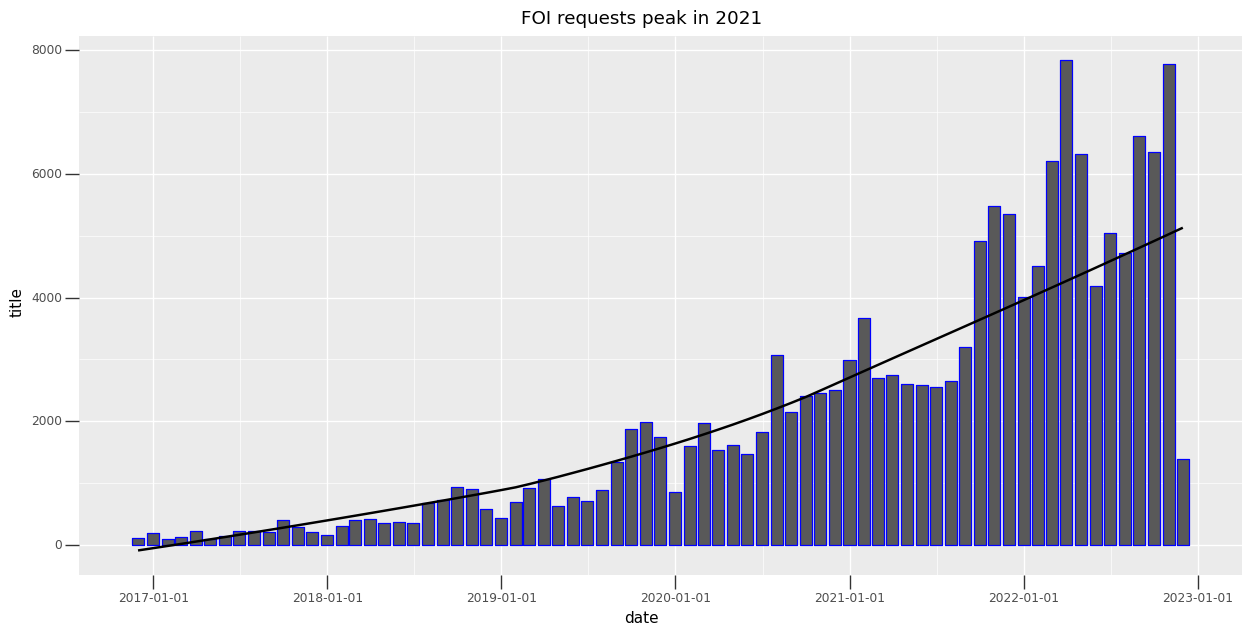

<ggplot: (686301172)>

In [51]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_col(color="blue", stat="identity") + 
    geom_smooth()+
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [52]:
month_query = df.resample('M', on='date').title.count().sort_values(ascending=False)
month_query.head(10)
#Largest number of FOI requests recorded in February 2022.

date
2022-03-31    7837
2022-10-31    7785
2022-08-31    6615
2022-09-30    6349
2022-04-30    6326
2022-02-28    6218
2021-10-31    5481
2021-11-30    5349
2022-06-30    5050
2021-09-30    4917
Name: title, dtype: int64

### By year

In [53]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,311
1,2017-12-31,2413
2,2018-12-31,6484
3,2019-12-31,13489
4,2020-12-31,25588
5,2021-12-31,42478
6,2022-12-31,60983


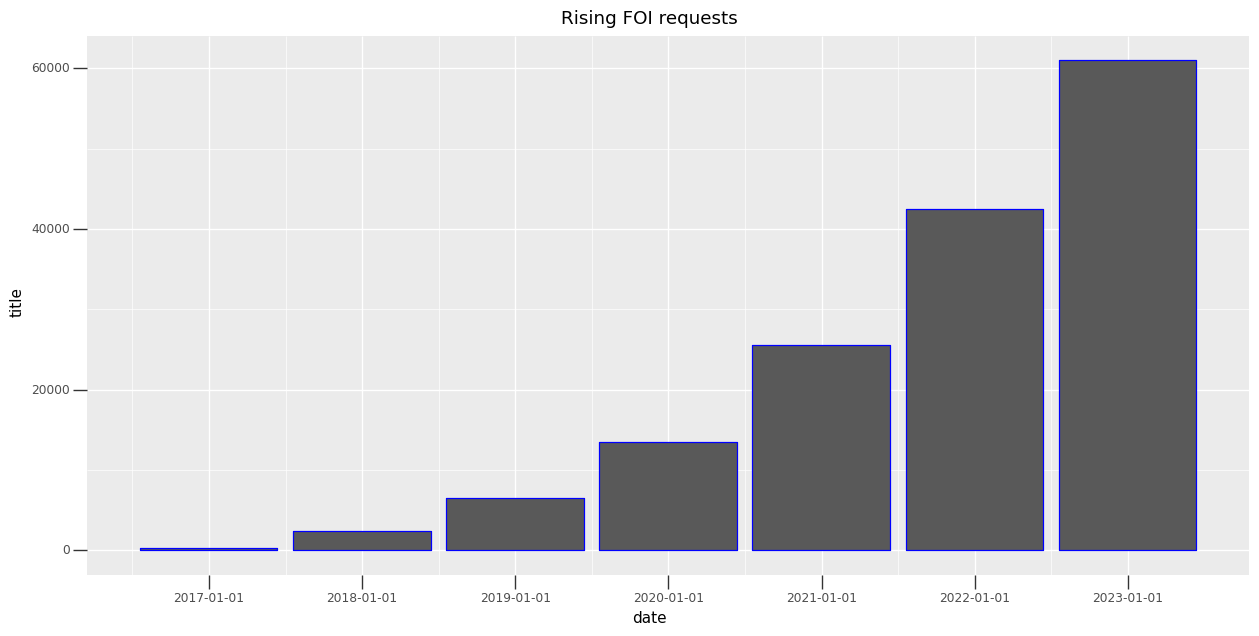

<ggplot: (686282990)>

In [54]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [55]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    675.884244
2018-12-31    168.711148
2019-12-31    108.035163
2020-12-31     89.695307
2021-12-31     66.007504
2022-12-31     43.563727
Freq: A-DEC, Name: title, dtype: float64

## Percentage of denied each month

In [79]:
denied = df[df.status=='DENIED'].resample('M', on='date').agency.count().to_frame().reset_index()
deny = denied.merge(month_query, how='inner', on='date') #merge denied df with year_query
deny.columns= ['date', 'denials', 'total_requests'] #rename columns

In [81]:
deny ['pct_denied'] = (deny.denials / deny.total_requests) * 100
deny.pct_denied.round(2)
deny

,date,denials,total_requests,pct_denied
0,2016-11-30,45,117,38.461538
1,2016-12-31,75,194,38.659794
2,2017-01-31,41,93,44.086022
3,2017-02-28,44,127,34.645669
4,2017-03-31,126,222,56.756757
...,...,...,...,...
68,2022-07-31,878,4723,18.589879
69,2022-08-31,1342,6615,20.287226
70,2022-09-30,934,6349,14.710978
71,2022-10-31,828,7785,10.635838


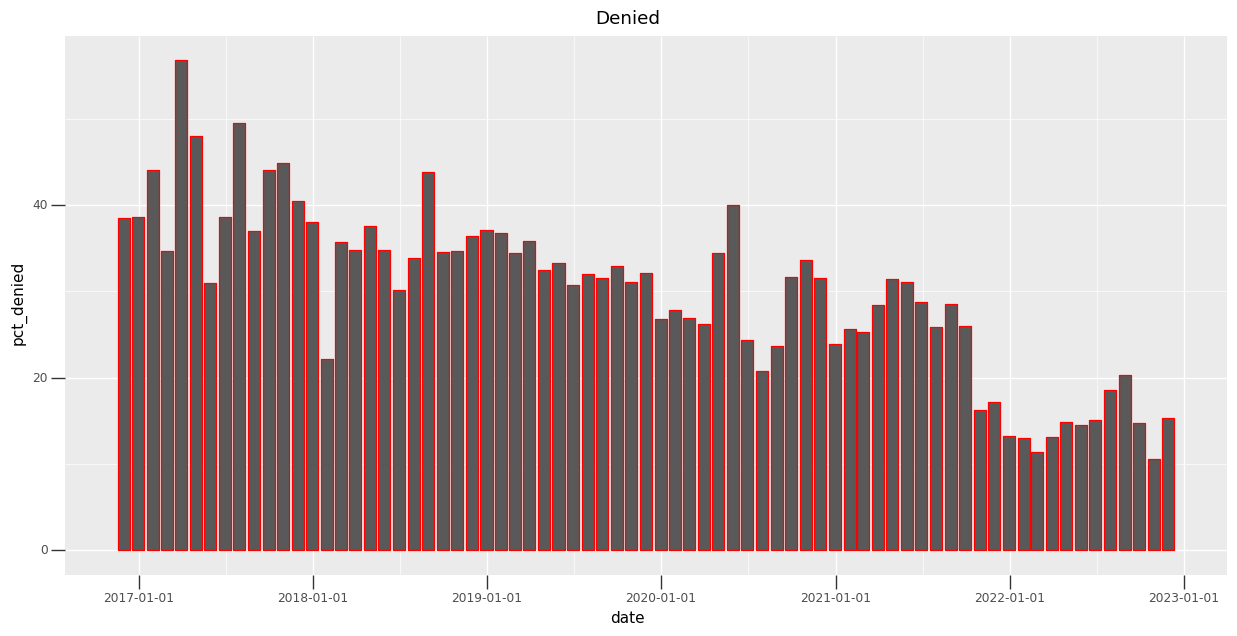

<ggplot: (686444776)>

In [83]:
(
    ggplot(deny, aes(x="date", y="pct_denied")) + 
    geom_col(color="red", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Denied")
)

## Percentage pending

In [93]:
pending = df[df.status=='PENDING'].resample('M', on='date').agency.count().to_frame().reset_index()
pending = denied.merge(month_query, how='inner', on='date') #merge denied df with year_query
pending.columns= ['date', 'pending_stat', 'total_requests'] #rename columns

In [95]:
pending ['pct_pending'] = (pending.pending_stat / pending.total_requests) * 100
pending.pct_pending.round(2)
pending

,date,pending_stat,total_requests,pct_pending
0,2016-11-30,45,117,38.461538
1,2016-12-31,75,194,38.659794
2,2017-01-31,41,93,44.086022
3,2017-02-28,44,127,34.645669
4,2017-03-31,126,222,56.756757
...,...,...,...,...
68,2022-07-31,878,4723,18.589879
69,2022-08-31,1342,6615,20.287226
70,2022-09-30,934,6349,14.710978
71,2022-10-31,828,7785,10.635838


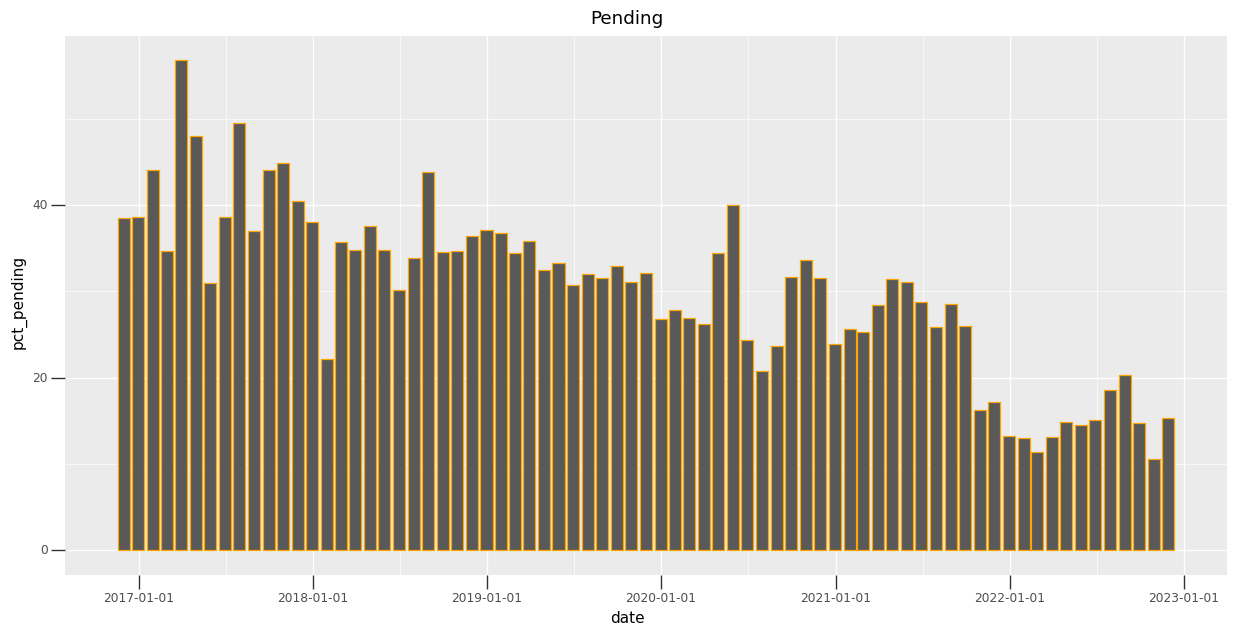

<ggplot: (686563734)>

In [97]:
(
    ggplot(pending, aes(x="date", y="pct_pending")) + 
    geom_col(color="orange", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Pending")
)

## Percentage closed

These are requests which were closed after 60 days of non-response from the requestor when the FOI officer asked for clarification of the request.

In [84]:
closed = df[df.status=='CLOSED'].resample('M', on='date').agency.count().to_frame().reset_index()
close = closed.merge(month_query, how='inner', on='date') #merge closed df with year_query
close.columns= ['date', 'closures', 'total_requests'] #rename columns

In [85]:
close.head()

,date,closures,total_requests
0,2016-11-30,13,117
1,2016-12-31,31,194
2,2017-01-31,7,93
3,2017-02-28,11,127
4,2017-03-31,7,222


In [86]:
close ['pct_closed'] = (close.closures / close.total_requests) * 100
close.head()

,date,closures,total_requests,pct_closed
0,2016-11-30,13,117,11.111111
1,2016-12-31,31,194,15.979381
2,2017-01-31,7,93,7.526882
3,2017-02-28,11,127,8.661417
4,2017-03-31,7,222,3.153153


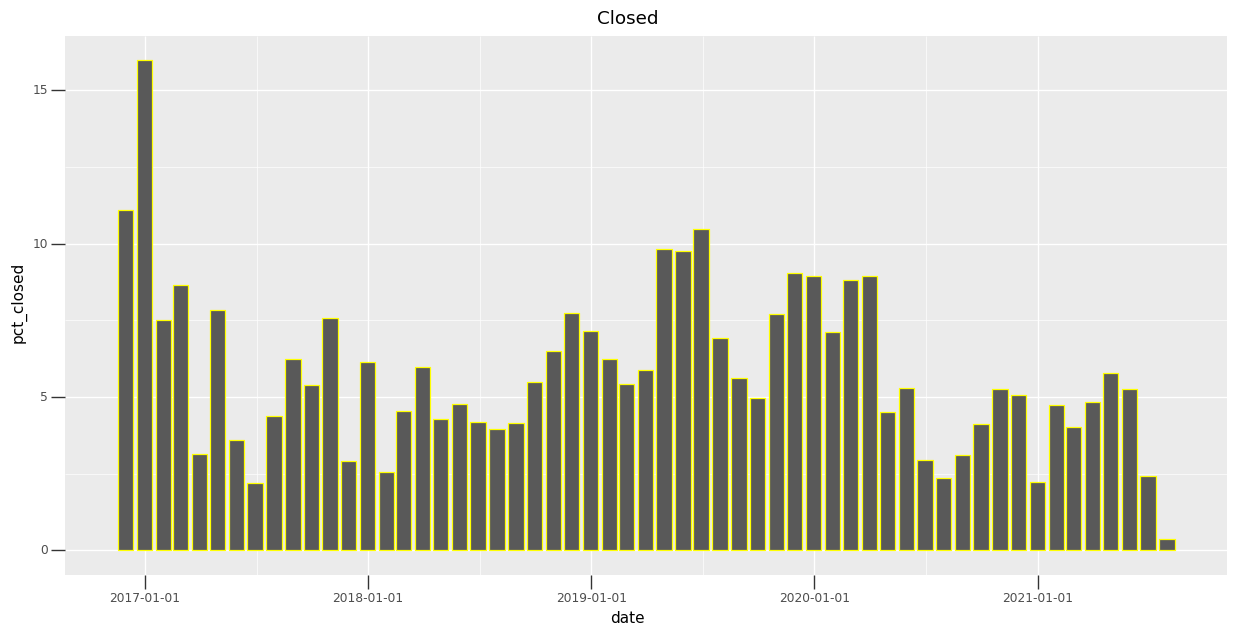

<ggplot: (705988428)>

In [88]:
(
    ggplot(close, aes(x="date", y="pct_closed")) + 
    geom_col(color="yellow", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Closed")
)

## Percentage approved

In [89]:
approved = df[df.status=='ACCEPTED'].resample('M', on='date').agency.count().to_frame().reset_index()
approve = approved.merge(month_query, how='inner', on='date') #merge approved df with year_query
approve.columns= ['date', 'approvals', 'total_requests'] #rename columns
approve

,date,approvals,total_requests
0,2016-11-30,13,117
1,2016-12-31,3,194
2,2017-01-31,1,93
3,2017-02-28,4,127
4,2017-03-31,9,222
...,...,...,...
68,2022-07-31,404,4723
69,2022-08-31,696,6615
70,2022-09-30,933,6349
71,2022-10-31,1127,7785


In [90]:
approve ['pct_approve'] = (approve.approvals / approve.total_requests) * 100
approve

,date,approvals,total_requests,pct_approve
0,2016-11-30,13,117,11.111111
1,2016-12-31,3,194,1.546392
2,2017-01-31,1,93,1.075269
3,2017-02-28,4,127,3.149606
4,2017-03-31,9,222,4.054054
...,...,...,...,...
68,2022-07-31,404,4723,8.553885
69,2022-08-31,696,6615,10.521542
70,2022-09-30,933,6349,14.695228
71,2022-10-31,1127,7785,14.476557


/opt/homebrew/lib/python3.10/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


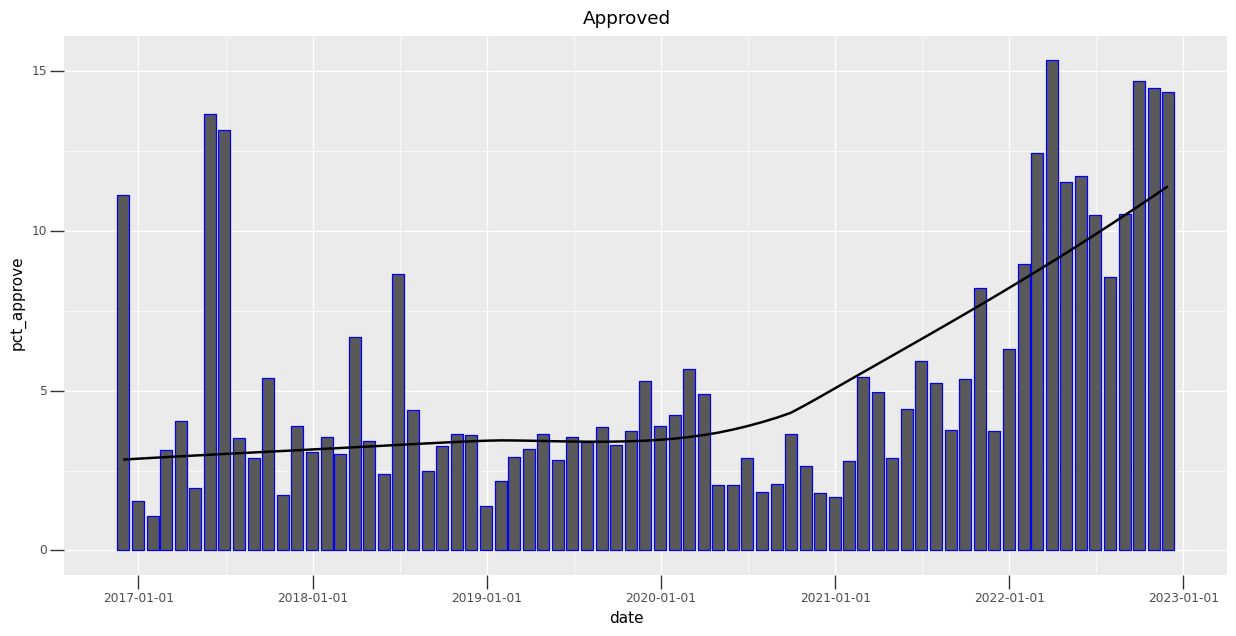

<ggplot: (705955795)>

In [91]:
(
    ggplot(approve, aes(x="date", y="pct_approve")) + 
    geom_col(color="blue", stat='identity') + 
    geom_smooth()+
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Approved")
)

In [92]:
df[df.status=="DENIED"].resample('D', on='date').agency.count().mean()

15.573861021629083

## Regression

Our questions are:

- What are the odds that your FOI request will be denied if your purpose is for media use?
- Which agency is more likely to deny an FOI request?

In [67]:
df.status.value_counts()

SUCCESSFUL                54375
DENIED                    33842
PENDING                   26497
ACCEPTED                  11229
PARTIALLY SUCCESSFUL       9898
AWAITING CLARIFICATION     5604
REFERRED                   3913
CLOSED                     3464
PROCESSING                 2852
EXTENDED                     75
Name: status, dtype: int64

In [68]:
df['status_code'] = df.status.replace({'SUCCESSFUL' or 'PARTIALLY SUCCESSFUL': 1, 'DENIED': 0})

In [69]:
df

,agency,date,title,status,purpose,period_covered,link,reason_denial,status_code
0,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,—,ACCEPTED
1,NAP,2016-11-25,Juan Arellano Drawings and Plans of Plaza Impr...,SUCCESSFUL,Research work on urban and public history duri...,01/01/1930 - 12/31/1950,NaN,—,1
2,PNP,2016-11-25,"Number of robbery, rape and riding in tandem c...",CLOSED,Research,06/01/2006 - 11/01/2016,NaN,—,CLOSED
3,PSA,2016-11-25,Ethnographic Population in the Philippines,SUCCESSFUL,Research,11/25/2000 - 11/25/2016,NaN,—,1
4,PCOO,2016-11-25,Agencies,DENIED,Research and basis of authenticity,07/01/2016 - 11/25/2016,NaN,—,0
...,...,...,...,...,...,...,...,...,...
151744,PNP,2022-11-07,CICL CALABARZON,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
151745,PNP,2022-11-07,CICL REGION 3,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
151746,NAMRIA,2022-11-07,Climate Disaster Risk Assessment of San Juan B...,PENDING,Architectural Thesis,11/07/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
151747,NBI,2022-11-07,ONLINE SCAM,PENDING,Personal,11/06/2022 - 11/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,PENDING
